In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import sklearn
import xgboost

In [2]:
CancerData = pd.read_excel('Project_Data/cancer patient data sets.xlsx')
CancerDataUpdate = pd.read_excel('Project_Data/cancer patient data sets update.xlsx')


In [3]:
CancerData.head

<bound method NDFrame.head of     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0            

In [4]:
CancerData.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

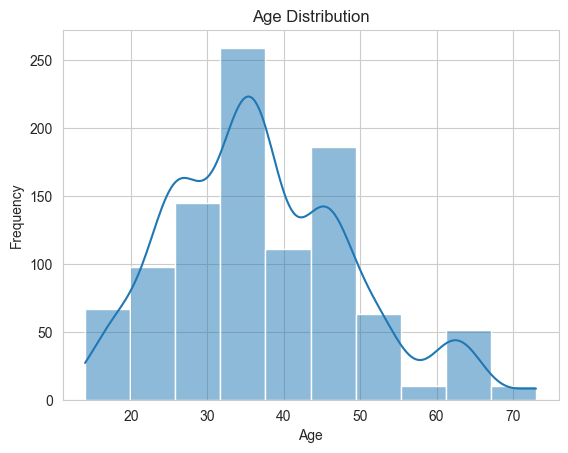

In [5]:
sns.histplot(CancerData['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


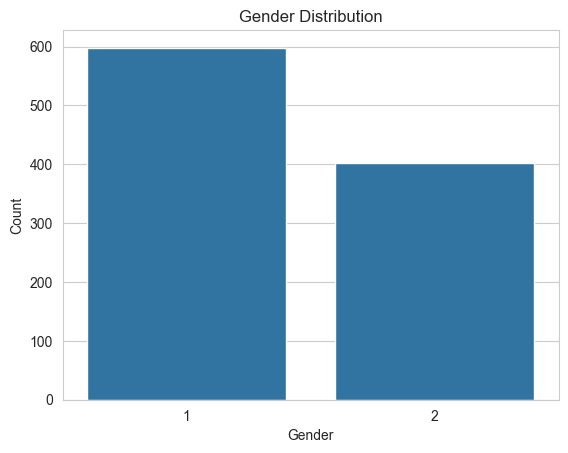

In [6]:
sns.countplot(x='Gender', data=CancerData)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


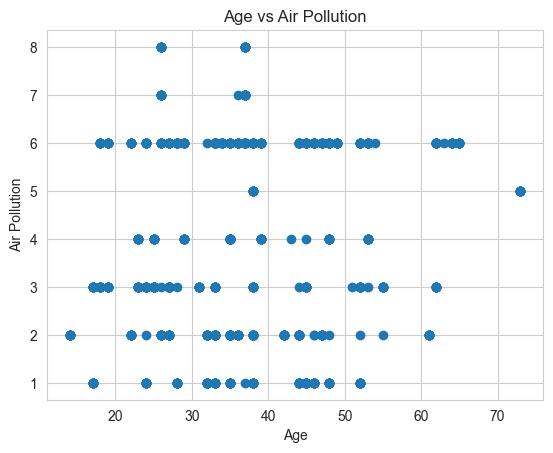

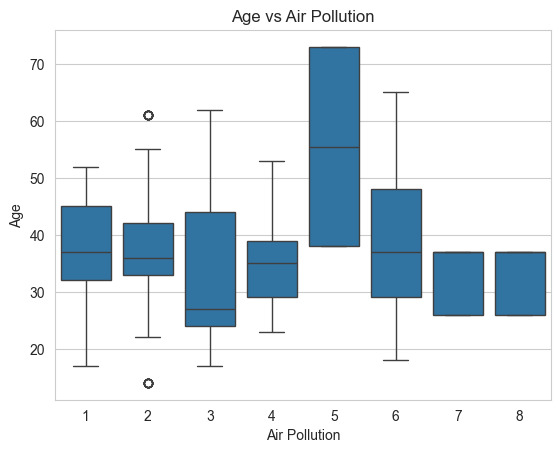

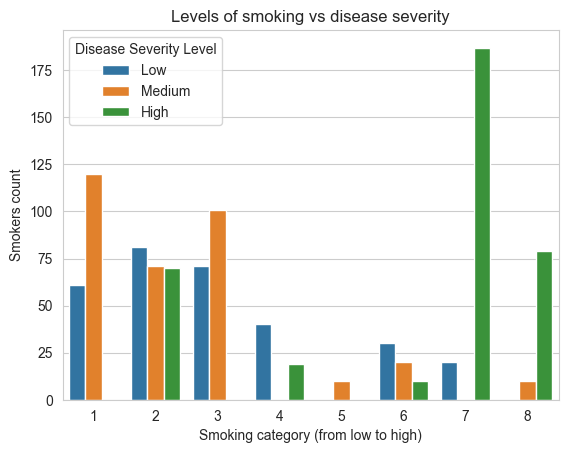

In [7]:
plt.scatter(CancerData['Age'], CancerData['Air Pollution'])
plt.title('Age vs Air Pollution')
plt.xlabel('Age')
plt.ylabel('Air Pollution')
plt.show()

sns.boxplot(x = CancerData['Air Pollution'], y = CancerData['Age'])
plt.title('Age vs Air Pollution')
plt.ylabel('Age')
plt.xlabel('Air Pollution')
plt.show()

sns.countplot(x = CancerData['Smoking'], hue = CancerData['Level'], )
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level')
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

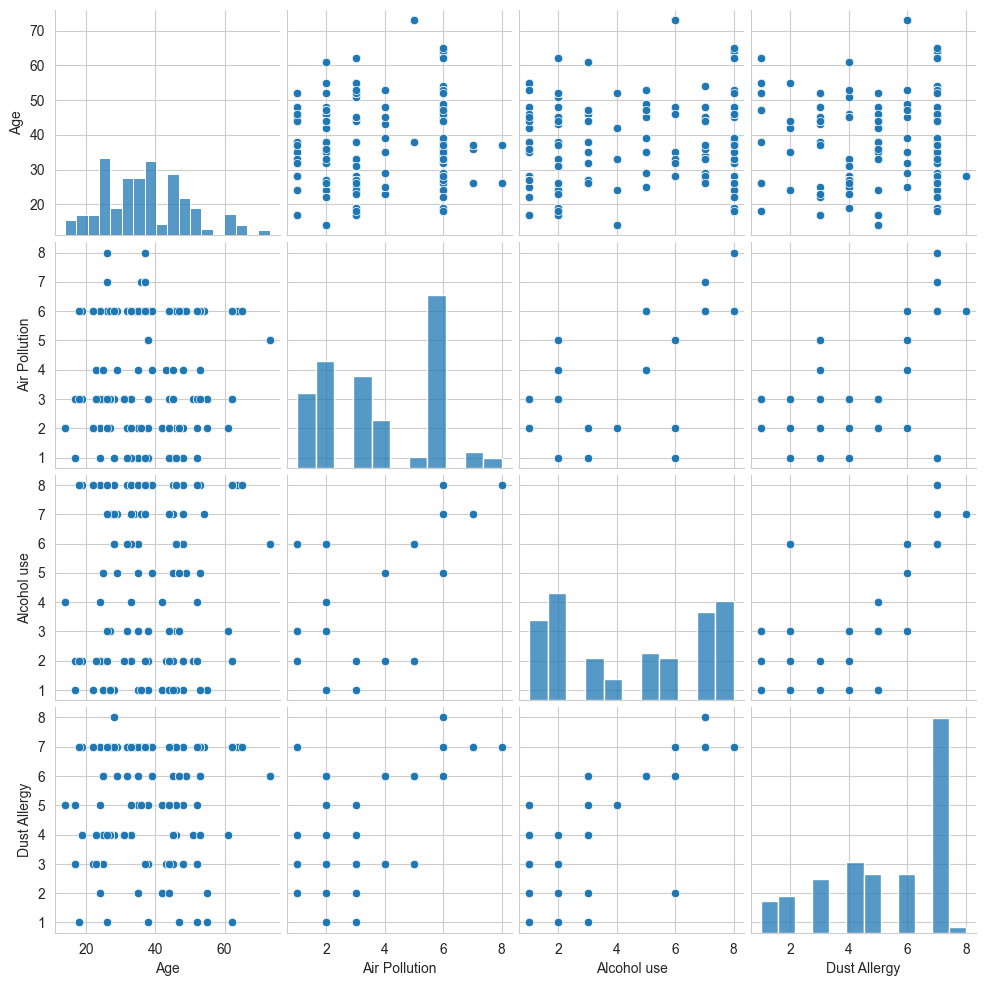

In [8]:
sns.pairplot(CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy']])
plt.show()


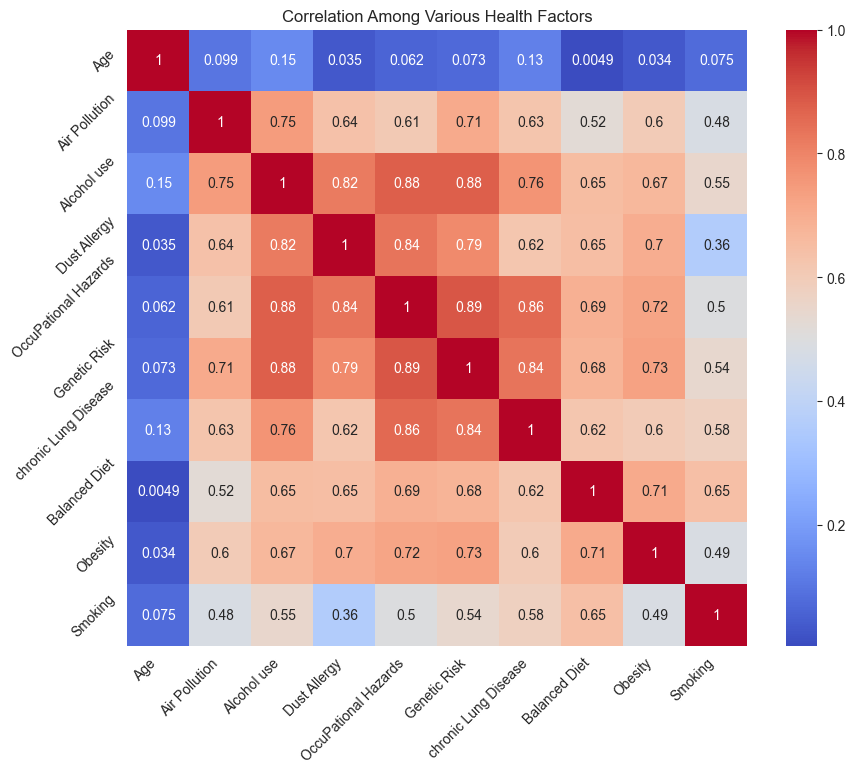

In [9]:
plt.figure(figsize=(10, 8))
corr = CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


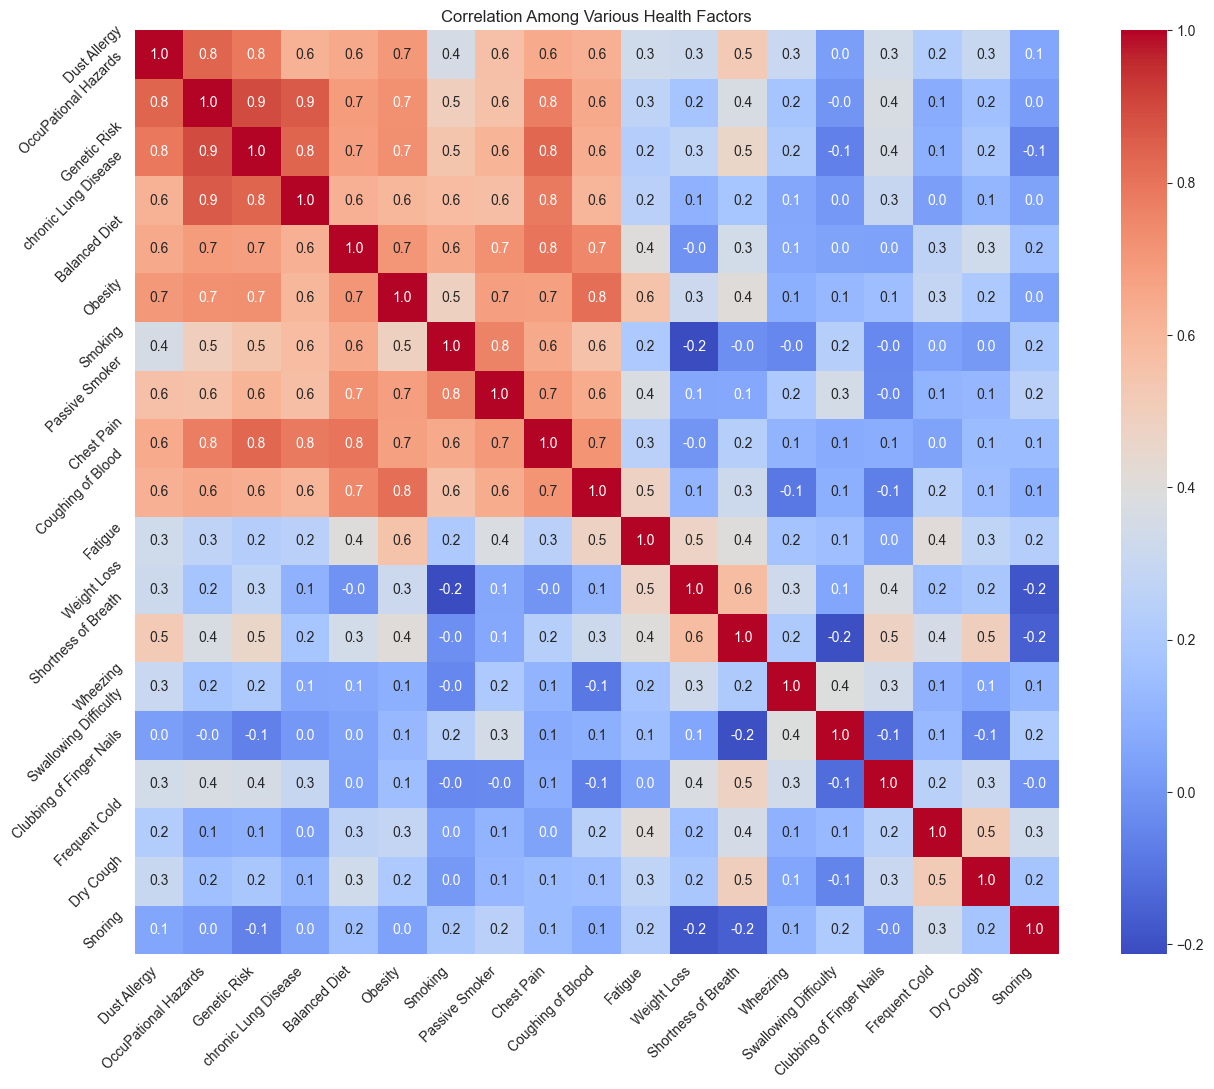

In [10]:
plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = CancerData[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring']].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


In [11]:
corr = CancerData.corr()  # Computes the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'P1'

In [ ]:
# more tables
pd.crosstab(CancerData['Gender'], CancerData['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()


In [ ]:
print(CancerData.isnull().values.any())

In [ ]:
print(CancerData.isnull().sum())


In [ ]:
CancerData.isnull().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(CancerData.isnull(), cbar=False, cmap='viridis')
plt.show()


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Assuming CancerData is your DataFrame
significant_corrs_list = []  # Use a list to collect rows

for col1 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
    for col2 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        if col1 != col2:
            corr_coef, p_value = pearsonr(CancerData[col1].dropna(), CancerData[col2].dropna())
            if p_value < 0.05:  # Adjust your significance level here
                significant_corrs_list.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation Coefficient': corr_coef,
                    'P-Value': p_value
                })

# Convert the list of dicts to a DataFrame
significant_corrs = pd.DataFrame(significant_corrs_list)

print(significant_corrs.sort_values('P-Value'))


In [ ]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()


In [ ]:

sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

In [ ]:

sns.lmplot(x='Alcohol use', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Alcohol use and Genetic risk')
plt.show()

In [ ]:
# Assuming 'Age' is your column name
sns.histplot(CancerData['Age'], kde=False)
plt.title('Histogram of Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Assuming 'PatientID' is the column name for patient IDs in your CancerDataUpdate DataFrame.
# Exclude the patient ID column and any other non-relevant columns, then calculate the correlation matrix.

# You may need to adjust this if your DataFrame has different column names for patient IDs or other identifiers.
numeric_data = CancerDataUpdate.drop(['Patient Id'], axis=1, errors='ignore')

# Calculate the correlation matrix on the numeric data only
corr = numeric_data.corr()

# Now you can plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Health Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()  # This will adjust the layout to prevent cutting off the edges
plt.show()


In [ ]:
# Let's assume 'Obesity' is significantly correlated with 'Level'
sns.barplot(x='Level', y='Obesity', data=CancerDataUpdate, estimator=np.mean, ci=None)
plt.title('Average Obesity by Disease Level')
plt.show()


In [ ]:
# If 'Genetic Risk' shows a strong correlation with 'Level'
sns.regplot(x='Level', y='Genetic Risk', data=CancerDataUpdate, fit_reg=True)
plt.title('Genetic Risk by Disease Level')
plt.show()


In [ ]:
# Example: Violin plot for 'Genetic Risk' by 'Level'
sns.violinplot(x='Level', y='Genetic Risk', data=CancerDataUpdate)
plt.title('Genetic Risk Distribution Across Disease Levels')
plt.show()


In [ ]:
# Example: Scatter plot for 'Fatigue' and 'Weight Loss' with hue by 'Level'
sns.scatterplot(x='Obesity', y='Genetic Risk', hue='Level', data=CancerDataUpdate)
plt.title('Relationship Between Fatigue and Weight Loss Across Disease Levels')
plt.show()


In [ ]:
# Example: Pair plot for a subset of health factors
subset = CancerDataUpdate[['chronic Lung Disease', 'Obesity', 'Smoking', 'Level']]
sns.pairplot(subset, hue='Level')
plt.show()


#### Here the predictive analytics start
Once the problem you want to tackle has been assessed and refined, you can proceed with the predictive analytics part. As a reminder, the main goal of predictive analytics is to build a predictive model in order to be able to make predictions on unseen data, based on the informative content of the existing data.
Required activities
- Identify the target variable y for the predictive problem at hand
- Analyze the distribution of the target variable y: Is it balanced or unbalanced?
- Split the available data into a training-testing-validation set.
o The training set will be used to train the predictive model.
o The testing set will be used to assess the model performance.
o The validation set is a subset of data which will be set aside (unseen from the
model) and used to simulate the future data that the model will need to predict.
- According to the defined problem (regression/binary classification/multiclass classification)
o Select at least two different appropriate performance metrics
o Assess one baseline model and at least three different supervised predictive
models using the aforementioned performance metric
- (Optionally) Employ unsupervised techniques to further extract insights from the data
- Critically discuss the modeling choices and the outcomes of the previous steps.
Note: Please note that developing a prototype is, by definition, an iterative process, so don’t be afraid to
go back to problem definition and adjust it as you gain a better understanding of the problem at hand.

In [12]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Assuming 'Level' is the target variable
target_counts = data['Level'].value_counts()

# Check if the target variable is balanced or unbalanced
if len(target_counts) == 2:
    # If there are exactly two classes, we consider it balanced if the ratio between the classes is within a certain threshold
    class_ratio = target_counts.iloc[0] / target_counts.iloc[1]
    threshold = 0.5  # You can adjust this threshold based on your requirements
    if 1 - threshold <= class_ratio <= 1 + threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")
else:
    # If there are more than two classes, we consider it balanced if each class has approximately the same number of samples
    min_samples = target_counts.min()
    max_samples = target_counts.max()
    threshold = 0.8 
    if min_samples / max_samples >= threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")


The target variable 'Level' is balanced.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest"]

classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

# Step 1: Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training, validation and testing sets

# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Now we have X_train_temp, X_val, X_test for features and y_train_temp, y_val, y_test for targets
# X_train_temp is the training data, X_val is the validation data, and X_test is the test data

# Now you have X_train, X_valid for features and y_train, y_valid for targets
# X_train is your finalized training data, and X_valid is your validation data

# You can print the sizes of the datasets to confirm the splits
print("Training data size:", X_train.shape)
print("Validation data size:", X_valid.shape)
print("Test data size:", X_test.shape)


# Step 5: Model selection and training
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy for Naive Bayesian Model: ", accuracy_score(y_test, y_pred))
print("F1 for Naive Bayesian Model: ", f1_score(y_test, y_pred, average=None))


# Creating empty DFs
accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
balanced_accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
f1_score_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)

# Concatenating the DataFrames
accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df] * len(names), ignore_index=True)
balanced_accuracy_per_dataset_df = pd.concat([balanced_accuracy_per_dataset_df] * len(names), ignore_index=True)
f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df] * len(names), ignore_index=True)

# For each dataset split, train the classifiers and evaluate
for technique in ["Ordinal Encoding"]:
    print("[INFO] - Categorical technique: ", technique)
    accuracy_line = {"Dataset Name": technique}
    balanced_accuracy_line = {"Dataset Name": technique}
    f1_score_line = {"Dataset Name": technique}
    
    for classifier, method_name in zip(classifiers, names):
        print("[INFO] - Classifier: ", method_name)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy_line[method_name] = accuracy_score(y_test, y_pred)
        balanced_accuracy_line[method_name] = balanced_accuracy_score(y_test, y_pred)
        f1_score_line[method_name] = f1_score(y_test, y_pred, average=None)
        
    # Append the lines to the DataFrames
    accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df, pd.DataFrame([accuracy_line])], ignore_index=True)
    balanced_accuracy_per_dataset_df = pd.concat([balanced_accuracy_per_dataset_df, pd.DataFrame([balanced_accuracy_line])], ignore_index=True)
    f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df, pd.DataFrame([f1_score_line])], ignore_index=True)

# Step 6: Model evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example new data (replace this with your own new data)
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Air Pollution': [3],
    'Alcohol use': [2],
    'Dust Allergy': [4],
    'OccuPational Hazards': [5],
    'Genetic Risk': [6],
    'chronic Lung Disease': [3],
    'Balanced Diet': [7],
    'Obesity': [4],
    'Smoking': [6],
    'Passive Smoker': [2],
    'Chest Pain': [1],
    'Coughing of Blood': [1],
    'Fatigue': [2],
    'Weight Loss': [1],
    'Shortness of Breath': [3],
    'Wheezing': [2],
    'Swallowing Difficulty': [1],
    'Clubbing of Finger Nails': [1],
    'Frequent Cold': [2],
    'Dry Cough': [1],
    'Snoring': [3]
})

Training data size: (700, 23)
Validation data size: (150, 23)
Test data size: (150, 23)
Accuracy for Naive Bayesian Model:  0.88
F1 for Naive Bayesian Model:  [0.9        0.90909091 0.82978723]
[INFO] - Categorical technique:  Ordinal Encoding
[INFO] - Classifier:  Logistic Regression
[INFO] - Classifier:  Decision Tree
[INFO] - Classifier:  Random Forest
Accuracy: 1.0


C:\Users\TimEW\PycharmProjects\Responsible_Data_Analysis_Group_1_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TimEW\AppData\Local\Temp\ipykernel_24760\952229762.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df, pd.DataFr

In [14]:
accuracy_per_dataset_df

,Dataset Name,Logistic Regression,Decision Tree,Random Forest
0,Ordinal Encoding,0.993333,1.0,1.0


In [15]:
balanced_accuracy_per_dataset_df

,Dataset Name,Logistic Regression,Decision Tree,Random Forest
0,Ordinal Encoding,0.990741,1.0,1.0


In [16]:
f1_score_per_dataset_df

,Dataset Name,Logistic Regression,Decision Tree,Random Forest
0,Ordinal Encoding,"[1.0, 0.9859154929577465, 0.9894736842105263]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"


In [17]:

# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predicted cancer levels for new data:", predictions)


Predicted cancer levels for new data: ['Low']


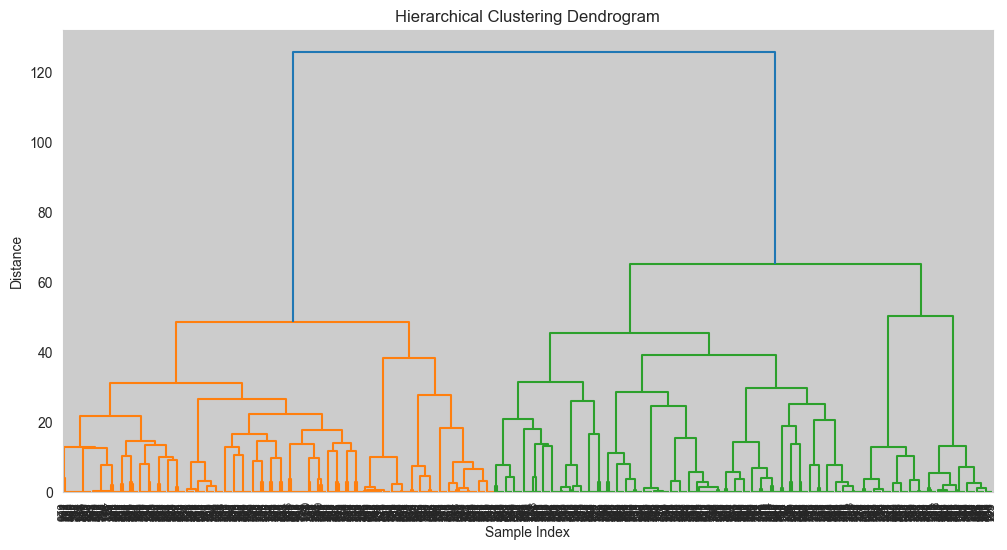

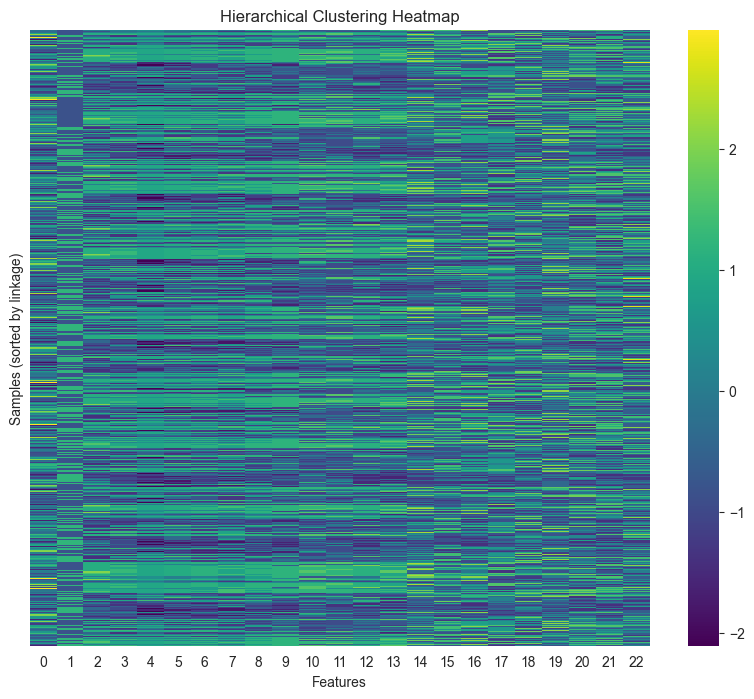

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

# Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Assuming 'Level' is not used for clustering
X = data.drop(['Patient Id', 'Level'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# You can also use a heatmap to visualize the clusters
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled[np.argsort(Z[:, 2])], cmap='viridis', yticklabels=False)
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples (sorted by linkage)')
plt.show()


### Prescriptive Analytics
After having developed a predictive model for the dataset, you will be employing this model on
the available datasets to extract actionable insights. In other words, the goal of prescriptive
analytics is to suggest (prescribe) the best decision options in order to take advantage of the
predicted future utilizing large amounts of data (Šikšnys & Pedersen, 2016).
Required activities
- Perform an appropriate cross-validation of the model, using at least 5 folds on the proposed dataset to assess model robustness.
- Build an ensemble predictor from the models tested during the predictive phase and assess its performance with respect to a single model.

- Discuss performance of the models on untested data (validation) and/or
minority/protected classes (in case of a classification problem).
- Discuss the operationalization of the model:
o How and where will it be deployed it?
o How to monitor its performances over time?
o Propose at least two What-If scenarios. Each What-If scenario should discuss how
changes in the context/data in which the predictive model is operating could affect
its performance.

Training data size: (700, 23)
Validation data size: (150, 23)
Test data size: (150, 23)
Logistic Regression: Mean Accuracy: 0.9871, Standard Deviation: 0.0083
Decision Tree: Mean Accuracy: 1.0000, Standard Deviation: 0.0000


C:\Users\TimEW\PycharmProjects\Responsible_Data_Analysis_Group_1_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TimEW\PycharmProjects\Responsible_Data_Analysis_Group_1_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

Random Forest: Mean Accuracy: 1.0000, Standard Deviation: 0.0000
Naive Bayes: Mean Accuracy: 0.8943, Standard Deviation: 0.0194
Ensemble Predictor Accuracy on Validation Data: 1.0000


C:\Users\TimEW\PycharmProjects\Responsible_Data_Analysis_Group_1_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


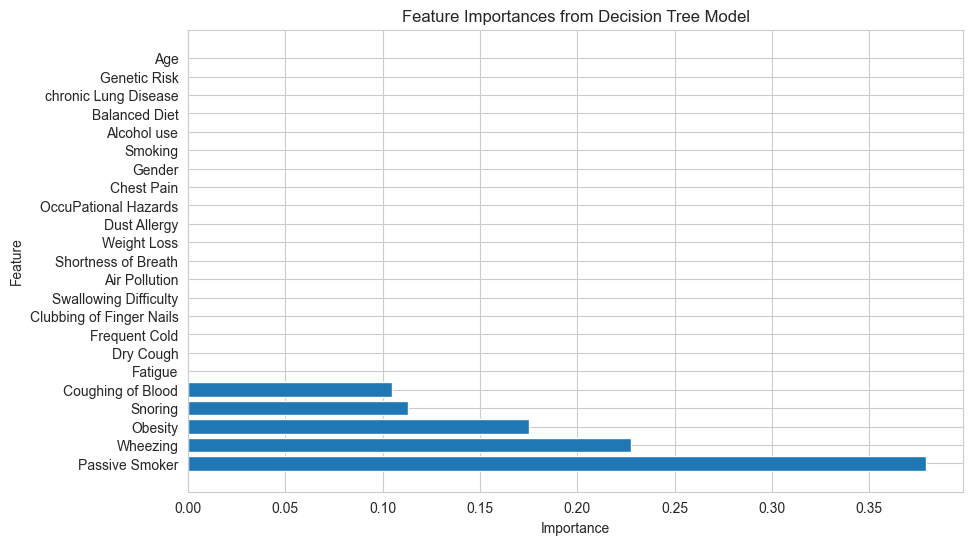

                     Feature  Importance
11            Passive Smoker    0.379165
17                  Wheezing    0.227588
9                    Obesity    0.175314
22                   Snoring    0.113209
13         Coughing of Blood    0.104725
14                   Fatigue    0.000000
21                 Dry Cough    0.000000
20             Frequent Cold    0.000000
19  Clubbing of Finger Nails    0.000000
18     Swallowing Difficulty    0.000000
2              Air Pollution    0.000000
16       Shortness of Breath    0.000000
15               Weight Loss    0.000000
4               Dust Allergy    0.000000
5       OccuPational Hazards    0.000000
12                Chest Pain    0.000000
1                     Gender    0.000000
10                   Smoking    0.000000
3                Alcohol use    0.000000
8              Balanced Diet    0.000000
7       chronic Lung Disease    0.000000
6               Genetic Risk    0.000000
0                        Age    0.000000
Training data 1 

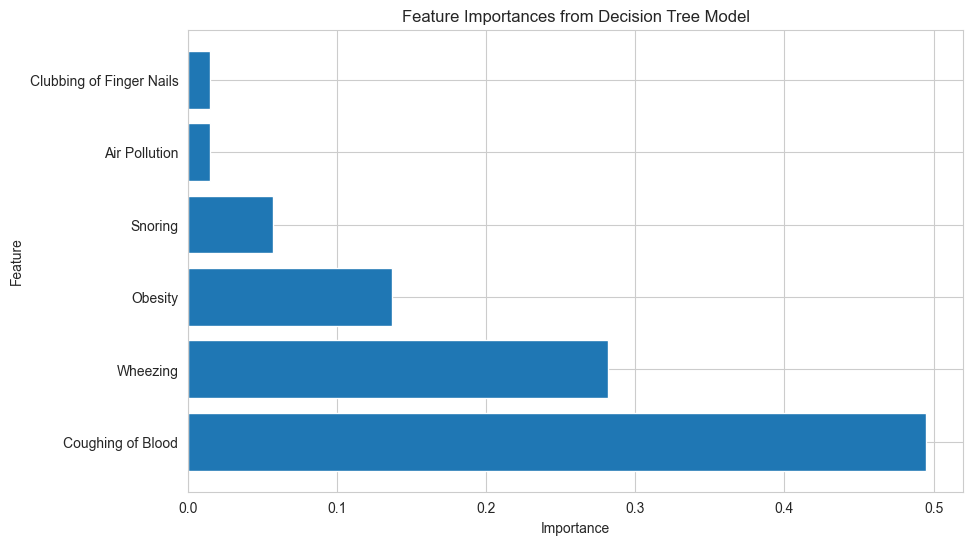

                    Feature  Importance
4         Coughing of Blood    0.495025
1                  Wheezing    0.281526
2                   Obesity    0.137029
3                   Snoring    0.056795
0             Air Pollution    0.014993
5  Clubbing of Finger Nails    0.014632


In [19]:

# Step 7: Predictions
# Use the trained model to make predictions on new data

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training, validation and testing sets

# First, split the data into training and temporary (remaining) data
X_train_main, X_remaining_main, y_train_main, y_remaining_main = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid_main, X_test_main, y_valid_main, y_test_main = train_test_split(X_remaining_main, y_remaining_main, test_size=0.5, random_state=42)

# You can print the sizes of the datasets to confirm the splits
print("Training data size:", X_train_main.shape)
print("Validation data size:", X_valid_main.shape)
print("Test data size:", X_test_main.shape)

# Define models for cross-validation
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Perform cross-validation with 5 folds
models = [('Logistic Regression', log_reg), 
          ('Decision Tree', dec_tree), 
          ('Random Forest', rand_forest), 
          ('Naive Bayes', naive_bayes)]

for name, model in models:
    scores = cross_val_score(model, X_train_main, y_train_main, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')

# Build ensemble predictor
ensemble = VotingClassifier(estimators=models, voting='hard')

# Train ensemble predictor on the entire training data
ensemble.fit(X_train_main, y_train_main)

# Evaluate ensemble predictor on the validation data
ensemble_accuracy = ensemble.score(X_valid_main, y_valid_main)
print(f'Ensemble Predictor Accuracy on Validation Data: {ensemble_accuracy:.4f}')

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_main, y_train_main)

# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_main.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

# Define the variables (features) you want to include
selected_features = ['Air Pollution', 'Wheezing', 'Obesity', 'Snoring', 'Coughing of Blood', 'Clubbing of Finger Nails']

# Subset the dataset to include only the selected features and the target variable
subset_data = data[selected_features + ['Level']]

# Split the dataset into training and testing sets
X = subset_data.drop('Level', axis=1)  # Features
y = subset_data['Level']  # Target
# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test_more, y_valid, y_test_more = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

X_train1, X_train_remaining, y_train1, y_train_remaining = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

X_train2, X_train_remaining, y_train2, y_train_remaining = train_test_split(X_train_remaining, y_train_remaining, test_size=0.6666, random_state=42)

X_train3, X_train4, y_train3, y_train4 = train_test_split(X_train_remaining, y_train_remaining, test_size=0.5, random_state=42)

# You can print the sizes of the datasets to confirm the splits
print("Training data 1 size:", X_train1.shape)
print("Training data 2 size:", X_train2.shape)
print("Training data 3 size:", X_train3.shape)
print("Training data 4 size:", X_train4.shape)
print("Validation data size:", X_valid.shape)
print("Test data size:", X_test_more.shape)

# Train the machine learning model
dt_classifier.fit(X_train1, y_train1)
dt_classifier.fit(X_train2, y_train2)
dt_classifier.fit(X_train3, y_train3)
dt_classifier.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred_more = dt_classifier.predict(X_test_more)

# Evaluate the model
accuracy = accuracy_score(y_test_more, y_pred_more)
print("Accuracy on test data:", accuracy)

dt_classifier_accuracy = dt_classifier.score(X_valid, y_valid)
print(f'{dt_classifier}: Accuracy on validation: {dt_classifier_accuracy:.4f}')


# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

# Intrinsic explanation new model

In [20]:
CancerData

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [21]:
# Get a list of feature names (excluding the outcome variable: income)
CancerData.drop(['Patient Id'], axis=1, inplace=True)

In [22]:
feature_names = CancerData.columns[:-1]
feature_names

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [23]:
# Mark labels and encode them using sklearn
labels = CancerData.iloc[:, -1]
le = sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = CancerData.iloc[:, :-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)
# Check if there are categorical varibles that we need to make dummies for
print(data.dtypes)

Class names:  ['High' 'Low' 'Medium']
Label mapping:  {'High': 0, 'Low': 1, 'Medium': 2}
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
dtype: object


In [24]:
# Get a list of which variables are categorical
categorical_features = [i for i in range(len(data.dtypes)) if data.dtypes[i] == 'object']
print("Indices of categorical features: ", categorical_features)

Indices of categorical features:  []


C:\Users\TimEW\AppData\Local\Temp\ipykernel_24760\2893046634.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_features = [i for i in range(len(data.dtypes)) if data.dtypes[i] == 'object']
C:\Users\TimEW\AppData\Local\Temp\ipykernel_24760\2893046634.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categorical_features = [i for i in range(len(data.dtypes)) if data.dtypes[i] == 'object']
C:\Users\TimEW\AppData\Local\Temp\ipykernel_24760\2893046634.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

In [25]:
print("Shape: ", data.shape)
data.head()

Shape:  (1000, 23)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [26]:
categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    # Use label encoder to map categories to numbers
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data.iloc[:, feature])
    # Replace the categories with corresponding numbers in the original data
    data.iloc[:, feature] = le.transform(data.iloc[:, feature])
    # Store and print the mappings for reference later
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")


In [27]:
   # This variable is where we store the original names of each category for each variable
categorical_names

{}

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# We can (and will) use this encoder function to transform the categorical columns into dummies-- 
# but we can't do that to the original dataset if we want to use LIME After training
encoder = ColumnTransformer(transformers=[('get_dummies', OneHotEncoder(), categorical_features)], remainder='passthrough')
encoder = encoder.fit(data)

In [29]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data, labels, train_size=0.80, random_state=10)
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (800, 23)
Test shape:  (200, 23)


In [30]:
# Fit the model
gbtree = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree.fit(encoder.transform(train), labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
# Make predictions 
pred_labels_test = gbtree.predict(encoder.transform(test))
# Calcualte accuracy on the test set
print("Test set accuracy: ", sklearn.metrics.accuracy_score(labels_test, pred_labels_test))

Test set accuracy:  1.0


# Prepare for the feature importance plot

In [32]:
# Get feature names for the transformed dataset so that they'll show up on the plot 
gbtree_features_orig = gbtree.get_booster().feature_names
gbtree_features = []
for cat_var in categorical_names:
    cat_var_names = [str(feature_names[cat_var]) + " = " + str(cat) for cat in categorical_names[cat_var]]
    gbtree_features.extend(cat_var_names)
gbtree_features.extend([feature_names[i] for i in range(len(feature_names)) if i not in categorical_features])
gbtree.get_booster().feature_names = gbtree_features

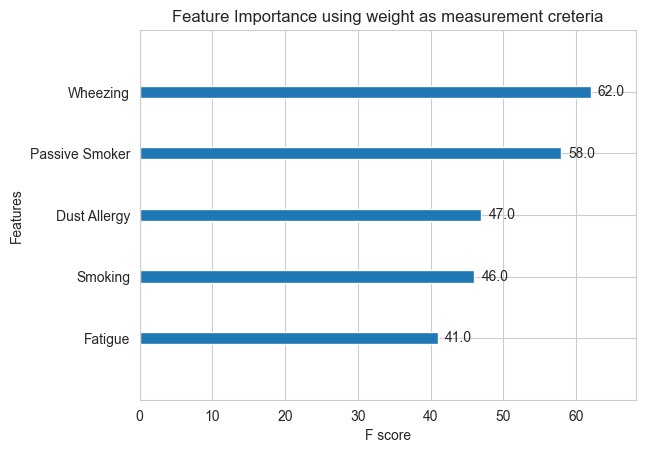

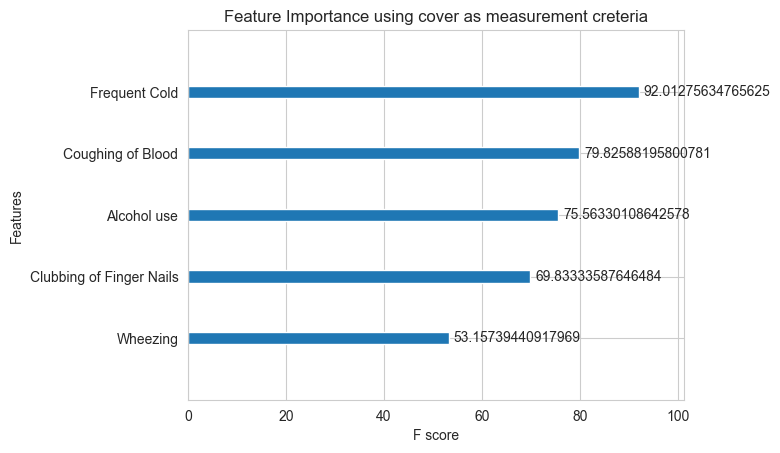

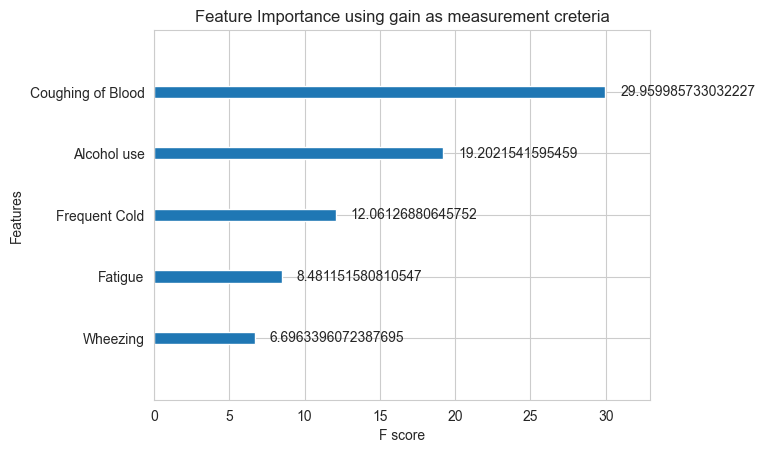

In [33]:
# plt.rcParams["figure.figsize"] = (10,20)
xgboost.plot_importance(gbtree, importance_type="weight", max_num_features=5)
plt.title("Feature Importance using weight as measurement creteria")
plt.show()
xgboost.plot_importance(gbtree, importance_type="cover", max_num_features=5)
plt.title("Feature Importance using cover as measurement creteria")
plt.show()
xgboost.plot_importance(gbtree, importance_type="gain", max_num_features=5)
plt.title("Feature Importance using gain as measurement creteria")
plt.show()

# Shap

In [34]:
import shap
import xgboost
from sklearn.preprocessing import LabelEncoder

In [35]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train_main)
y_test_encoded = label_encoder.transform(y_remaining_main)

# Fit the model
gbtree_shap = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree_shap.fit(X_train_main, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
import sklearn

# Make predictions 
pred_labels_test = gbtree_shap.predict(X_remaining_main)
# Test accuracy again (it should be the same as the first model ~ 0.87 +/- 0.05)
print("Test set accuracy: ", sklearn.metrics.accuracy_score(y_test_encoded, pred_labels_test))

Test set accuracy:  1.0


In [37]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(gbtree_shap)
shap_values = explainer.shap_values(X_remaining_main)

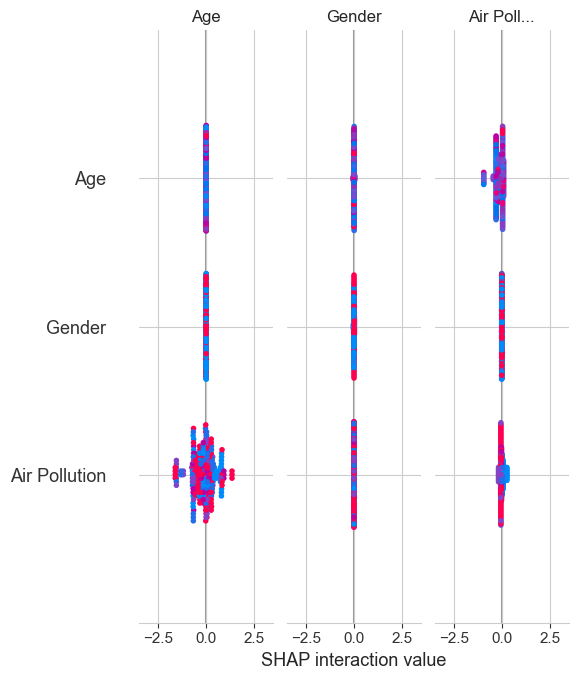

In [38]:
#Uncomment if using Colab
shap.initjs()
shap.summary_plot(shap_values, X_remaining_main, plot_type="bar")

In [39]:
shap.initjs()

#i is the index of the data point of intrest
i = 0
_waterfall.waterfall_legacy(explainer.expected_value, shap_values[i, :], X_remaining_main.iloc[i, :])

NameError: name '_waterfall' is not defined

In [40]:
#Uncomment if using Colab
shap.initjs()
i=0
shap.force_plot(explainer.expected_value[i], shap_values[i])

In [41]:
#Uncomment if using Colab
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

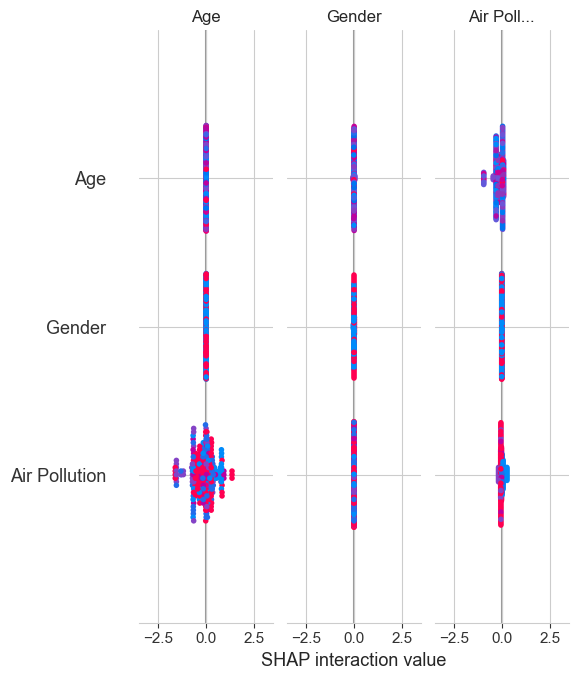

In [42]:
#Uncomment if using Colab
shap.initjs()
shap.summary_plot(shap_values, X_remaining_main)

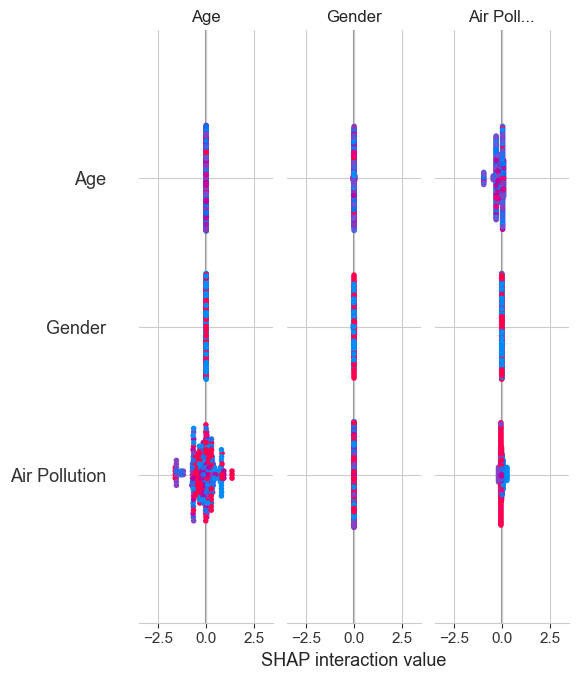

In [43]:
# with Possibility to filter and/or create cohort plots
# First 1000
shap.summary_plot(shap_values[:1000,:], X_remaining_main.iloc[:1000,:])